# Well Log Investigation and Quality Assessment

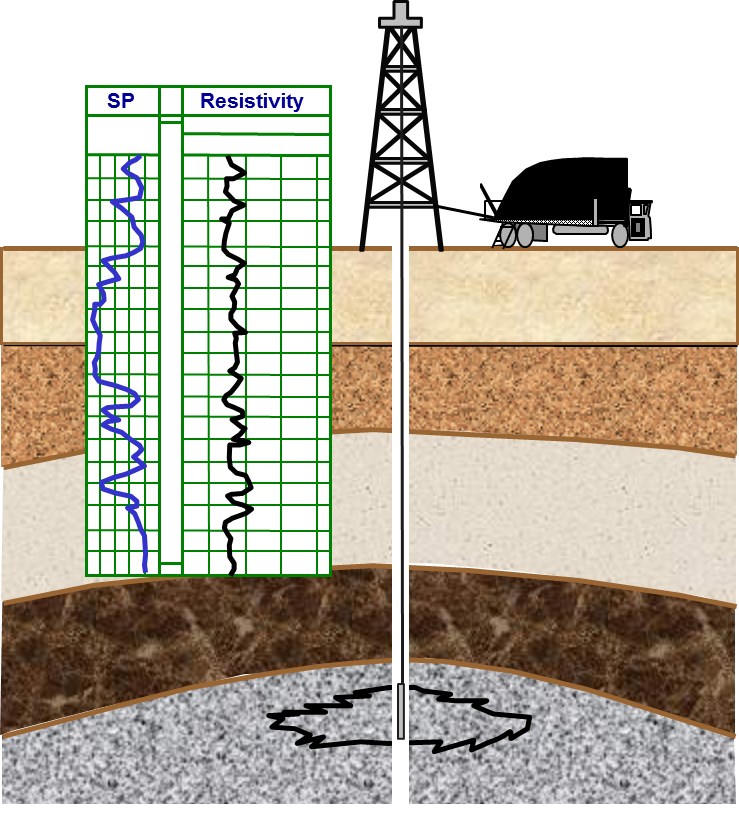

## Table of contents

<li><a href="#libraries">Python Libraries</a>
<li><a href="#Exploration">Data Discovery & Exploration</a>
<li><a href="#Visualisation">Visualisation</a>
<li><a href="#Quality">Quality Assessment</a>

<a id="libraries"></a>
## Python Libraries

In [1]:
# Conventional data processsing libraries 
import pandas as pd
import numpy as np
import os

# Well log data processing libraries
import lasio as las
from welly import Project
from welly import curve
from welly import Well


# Well log data quality assessment libraries 
from welly import quality as wq
from IPython.display import HTML
import missingno as msn

# data visualisation libraries
import matplotlib.pyplot as plt

# Well log mapping
import folium

<a id="Exploration"></a>
# Data Discovery & Exploration

#### Loading Multiple Las files

In [2]:
# loading the multiple las files using the Project module from the welly library
las_wells = Project.from_las("C:/Users/g202216220/Desktop/ARCHIBONG/*.las")

12it [00:02,  4.04it/s]


In [3]:
# viewing the multiple las files imported
las_wells

Index,UWI,Data,Curves
0,023_19810823_1_GR,1 curves,GR
1,060_19880503_2_GR,1 curves,GR
2,096_19841002_1_GR,1 curves,GR
3,N/A,2 curves,"NGAM, CCL"
4,158_19770623_1_GR,1 curves,GR
5,N/A,2 curves,"NGAM, CCL"
6,N/A,2 curves,"NGAM, CCL"
7,192_19880728_1_GR,1 curves,GR
8,193_19880727_1_GR,1 curves,GR
9,,5 curves,"GR, DT, RHOB, DRHO, NPHI"


In [4]:
# calling upon the UWI
las_wells.uwis

['023_19810823_1_GR',
 '060_19880503_2_GR',
 '096_19841002_1_GR',
 'N/A',
 '158_19770623_1_GR',
 'N/A',
 'N/A',
 '192_19880728_1_GR',
 '193_19880727_1_GR',
 '',
 '261_19751104_1_GR',
 '']

In [5]:
# printing out the individual details of each well
for _ in las_wells:
    print(f"{_.name}\t {_.location}\n\n".expandtabs(10))

23         Location({'position': None, 'crs': CRS({}), 'location': '', 'province': '', 'ekb': 20.61, 'tdd': '-', 'td': None, 'deviation': None})


60         Location({'position': None, 'crs': CRS({}), 'location': '', 'province': '', 'ekb': 21.25, 'tdd': '-', 'td': None, 'deviation': None})


96         Location({'position': None, 'crs': CRS({}), 'location': '', 'province': '', 'ekb': 20.5, 'tdd': '-', 'td': None, 'deviation': None})


B143       Location({'position': None, 'crs': CRS({}), 'location': 'N/A', 'province': 'N/A', 'td': None, 'deviation': None})


158        Location({'position': None, 'crs': CRS({}), 'location': '', 'province': '', 'ekb': 20.08, 'tdd': '-', 'td': None, 'deviation': None})


B165       Location({'position': None, 'crs': CRS({}), 'location': 'N/A', 'province': 'N/A', 'td': None, 'deviation': None})


b188       Location({'position': None, 'crs': CRS({}), 'location': 'N/A', 'province': 'N/A', 'td': None, 'deviation': None})


192        Location({'position':

#### Checking for specific log types within the compiled well log data

In [6]:
def log_type(log):
    
    # function to check for specific log types within the compiled files
    
    checked_wells = []   # declares and initially empty list of well names

    for _ in las_wells:  # loop through all the well types
        x = _.get_curve(log)  # takes in the stipulated well types
        if x is None:                 
            pass                      # checks for the stated well type and does nothing if type is not found
        else:                         
            checked_wells.append(_.name) #appends the name of wells which possesses the required log type to the checked wells
    print(checked_wells)                 # prints a list of the names of all the well with the required log type

In [7]:
log_type("GR")

[23, 60, 96, 158, 192, 193, 'SLOTEN-02', 261]


#### Saving the well log files as a pandas dataframe

In [8]:
def wells_dataframe(multi_wells):
    
    # function saving the well as a pandas dataframe

    well_dict = {}    # Creates an empty dictionary
    for _ in multi_wells:   # For loops to save the UWIs, wellname and location
        well_dict[_.uwi] = {"well_name": _.name,
                           "well_location":_.location}
    
    
    wells_df = pd.DataFrame.from_dict(well_dict, orient="index") # converts the well name and location from rows to columns
    wells_df.reset_index(inplace=True)                           # resets the index so the UWI values are in a column
    wells_df.rename(columns={"index":"UWI"}, inplace=True)       # renames the index column to "UWIs"
    return wells_df

In [9]:
wells_df = wells_dataframe(las_wells)

In [10]:
wells_df

,UWI,well_name,well_location
0,023_19810823_1_GR,23,"Location({'position': None, 'crs': CRS({}), 'l..."
1,060_19880503_2_GR,60,"Location({'position': None, 'crs': CRS({}), 'l..."
2,096_19841002_1_GR,96,"Location({'position': None, 'crs': CRS({}), 'l..."
3,N/A,b188,"Location({'position': None, 'crs': CRS({}), 'l..."
4,158_19770623_1_GR,158,"Location({'position': None, 'crs': CRS({}), 'l..."
5,192_19880728_1_GR,192,"Location({'position': None, 'crs': CRS({}), 'l..."
6,193_19880727_1_GR,193,"Location({'position': None, 'crs': CRS({}), 'l..."
7,,B 451,"Location({'position': None, 'crs': CRS({}), 'l..."
8,261_19751104_1_GR,261,"Location({'position': None, 'crs': CRS({}), 'l..."


In [11]:
wells_df.head()

,UWI,well_name,well_location
0,023_19810823_1_GR,23,"Location({'position': None, 'crs': CRS({}), 'l..."
1,060_19880503_2_GR,60,"Location({'position': None, 'crs': CRS({}), 'l..."
2,096_19841002_1_GR,96,"Location({'position': None, 'crs': CRS({}), 'l..."
3,N/A,b188,"Location({'position': None, 'crs': CRS({}), 'l..."
4,158_19770623_1_GR,158,"Location({'position': None, 'crs': CRS({}), 'l..."


In [12]:
wells_df.describe()

,UWI,well_name,well_location
count,9,9,9
unique,9,9,9
top,023_19810823_1_GR,23,"Location({'position': None, 'crs': CRS({}), 'l..."
freq,1,1,1


In [13]:
wells_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UWI            9 non-null      object
 1   well_name      9 non-null      object
 2   well_location  9 non-null      object
dtypes: object(3)
memory usage: 344.0+ bytes


In [14]:
# convert everything to a single dataframe file

# Read the Files

las_file_list = []
path = "C:/Users/g202216220/Desktop/ARCHIBONG/"

In [15]:
# View contents of the path, we will see LAS files plus an ASCII file
files = os.listdir(path)


# for loop to capture all .las files within the provided directory path
for _ in files:                           # iterates through all files within the directory
    if _.lower().endswith('.las'):        # searches for .las files
        las_file_list.append(path + _)    # appends all .las files to "las_file_list"

In [16]:
# Saving the wells as a list of pandas dataframes
df_list = []

for lasfile in las_file_list:  # iterates through all the files contained in "las_file_list"
    las_df = las.read(lasfile) # reads the las files
    lasdf = las_df.df()        # converts the las files into pandas dataframe
    
    lasdf['WELL'] = las_df.well.WELL.value    
    lasdf['DEPTH'] = lasdf.index              # indexing the depth
    df_list.append(lasdf)                     # appending the converted dataframes to the list dr_list

In [17]:
# concatenating to a single dataframe
wells_single_df = pd.concat(df_list, sort=True)

# visualising the single dataframe created
wells_single_df     

,CCL,DEPTH,DRHO,DT,GR,NGAM,NPHI,RHOB,WELL
0.1524,NaN,0.1524,NaN,NaN,23.1625,NaN,NaN,NaN,23
0.3048,NaN,0.3048,NaN,NaN,25.9833,NaN,NaN,NaN,23
0.4572,NaN,0.4572,NaN,NaN,32.6977,NaN,NaN,NaN,23
0.6096,NaN,0.6096,NaN,NaN,34.8431,NaN,NaN,NaN,23
0.7620,NaN,0.7620,NaN,NaN,36.9487,NaN,NaN,NaN,23
...,...,...,...,...,...,...,...,...,...
-0.7190,9948.9805,-0.7190,NaN,NaN,NaN,NaN,NaN,NaN,B 451
-0.7680,9951.0205,-0.7680,NaN,NaN,NaN,NaN,NaN,NaN,B 451
-0.8170,9954.0820,-0.8170,NaN,NaN,NaN,NaN,NaN,NaN,B 451
-0.8660,9950.0000,-0.8660,NaN,NaN,NaN,NaN,NaN,NaN,B 451


In [18]:
wells_single_df.head()    # First five rows

,CCL,DEPTH,DRHO,DT,GR,NGAM,NPHI,RHOB,WELL
0.1524,NaN,0.1524,NaN,NaN,23.1625,NaN,NaN,NaN,23
0.3048,NaN,0.3048,NaN,NaN,25.9833,NaN,NaN,NaN,23
0.4572,NaN,0.4572,NaN,NaN,32.6977,NaN,NaN,NaN,23
0.6096,NaN,0.6096,NaN,NaN,34.8431,NaN,NaN,NaN,23
0.7620,NaN,0.7620,NaN,NaN,36.9487,NaN,NaN,NaN,23


In [19]:
wells_single_df.describe()  # summary statistics

,CCL,DEPTH,DRHO,DT,GR,NGAM,NPHI,RHOB
count,108887.0000000000,150331.0000000000,9437.0000000000,19279.0000000000,41318.0000000000,108591.0000000000,9437.0000000000,9437.0000000000
mean,10011.8377841640,375.8539482509,0.0248967076,113.2202236178,51.6863690532,27.0343037149,0.1856413907,2.4260824047
std,1146.2992438702,418.8371997729,0.0976035618,38.7296844330,30.0544476199,19.1726744602,0.0753983961,0.1447685217
min,0.0000000000,-0.9150000000,-1.3309050000,43.8081820000,0.8369170000,0.0000000000,0.0188610000,1.5737650000
25%,9772.8531000000,142.2900000000,-0.0183800000,79.0610350000,23.4399750000,17.3600000000,0.1475830000,2.3483570000
50%,9992.3800000000,278.4800000000,0.0046390000,114.9630740000,50.5009500000,26.3500000000,0.1757210000,2.4251310000
75%,10216.7950000000,410.8000000000,0.0380600000,146.9347835000,76.3927482500,37.0900000000,0.2311520000,2.4684410000
max,35618.7500000000,2241.0000000000,0.3984090000,233.3709110000,168.5340580000,3846.9600000000,0.5042840000,2.8265890000


In [20]:
wells_single_df["WELL"].unique()   # shows how many wells are contained

array([23, 60, 96, 'B143', 158, 'B165', 'b188', 192, 193, 'SLOTEN-02',
       261, 'B 451'], dtype=object)

<a id="Visualisation"></a>

# Data Visualisation

#### Mapping the well logs

In [21]:
"""

# saving the average longitude and latitude values 
mean_lat = wells_df["well_location"].mean()
mean_long = wells_df["well_location"].mean()

# Generating the world map
m = folium.Map(location=[mean_lat,mean_long], zoom_start = 5)

# adding markers to the map 
for index,well_location in wells_df.iterrows():
    folium.Marker(well_location, popup= well_location[well_name]).add_to(m)
    
m

"""

'\n\n# saving the average longitude and latitude values \nmean_lat = wells_df["well_location"].mean()\nmean_long = wells_df["well_location"].mean()\n\n# Generating the world map\nm = folium.Map(location=[mean_lat,mean_long], zoom_start = 5)\n\n# adding markers to the map \nfor index,well_location in wells_df.iterrows():\n    folium.Marker(well_location, popup= well_location[well_name]).add_to(m)\n    \nm\n\n'

#### Plotting Curves for the wells individually

In [22]:
def plot_curve(curve,colour):

    # Function to plot curves from different wells
    
    fig, axs = plt.subplots(figsize=(14,10), ncols=len(las_wells)) # defines the figure and axis

    for (ax,well) in zip(axs, las_wells): # for loop iterates over each individual well within the wells
        x = well.get_curve(curve)     # defines which curve the plot is for
        if x is not None:
            ax = x.plot(ax=ax, c=colour)            # defines the colour of the plot
        ax.set_title(f"{curve} for \n{well.name}")  # defines the name of the plot
    
    
    plt.tight_layout() # manages the spaces between the subplots
    plt.show()         # shows the subplots

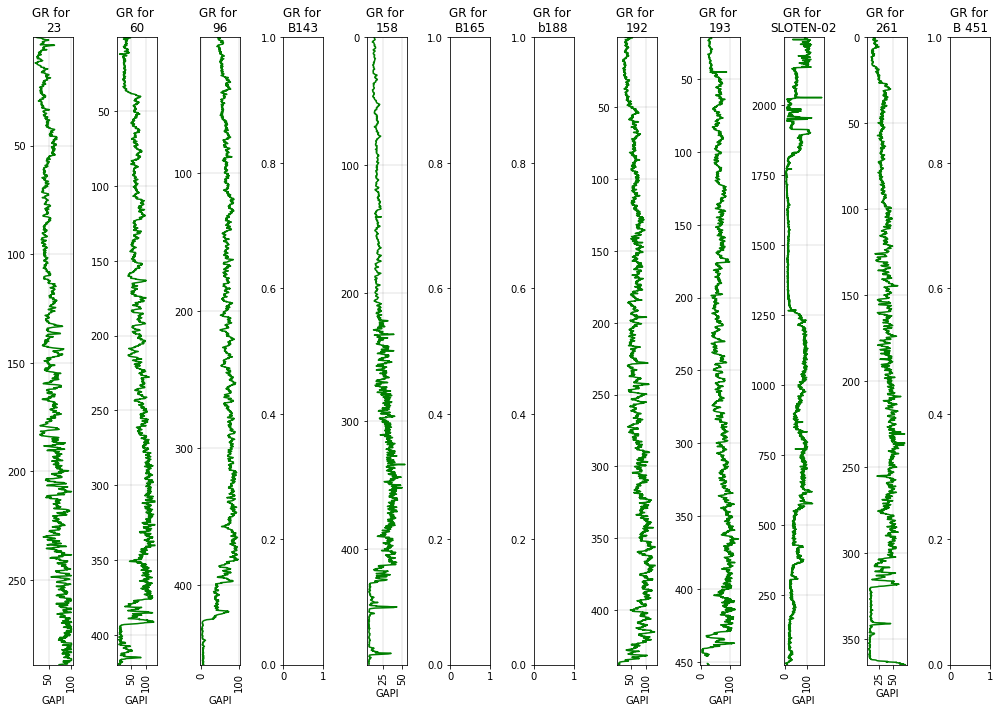

In [23]:
plot_curve("GR","green")

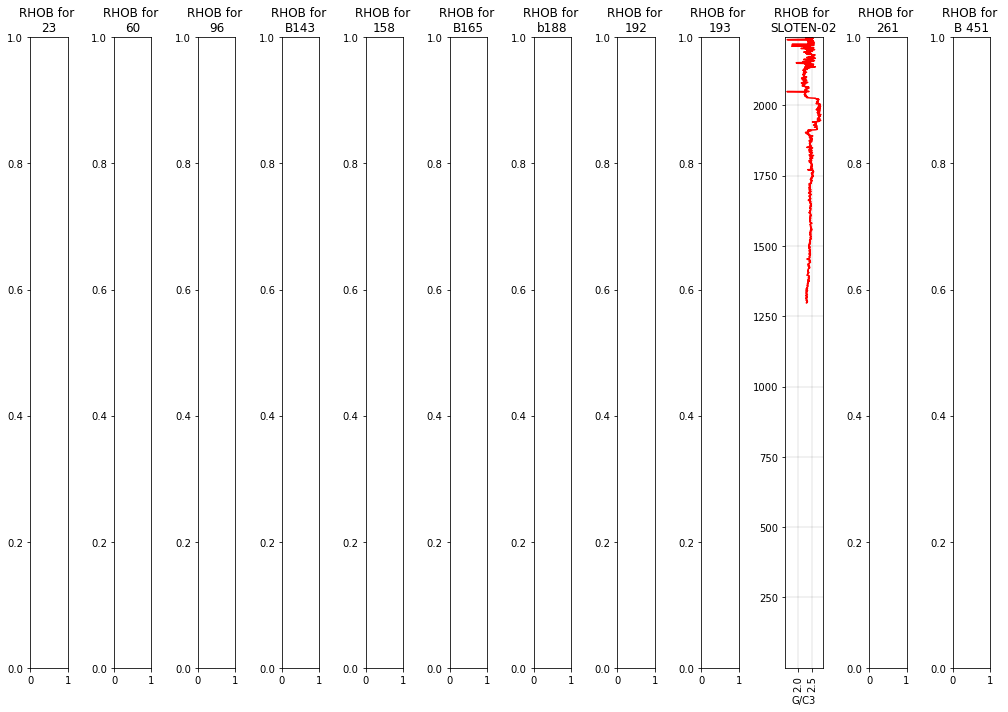

In [24]:
plot_curve("RHOB", "red")

#### Plotting the contents of the Wells together

<AxesSubplot:>

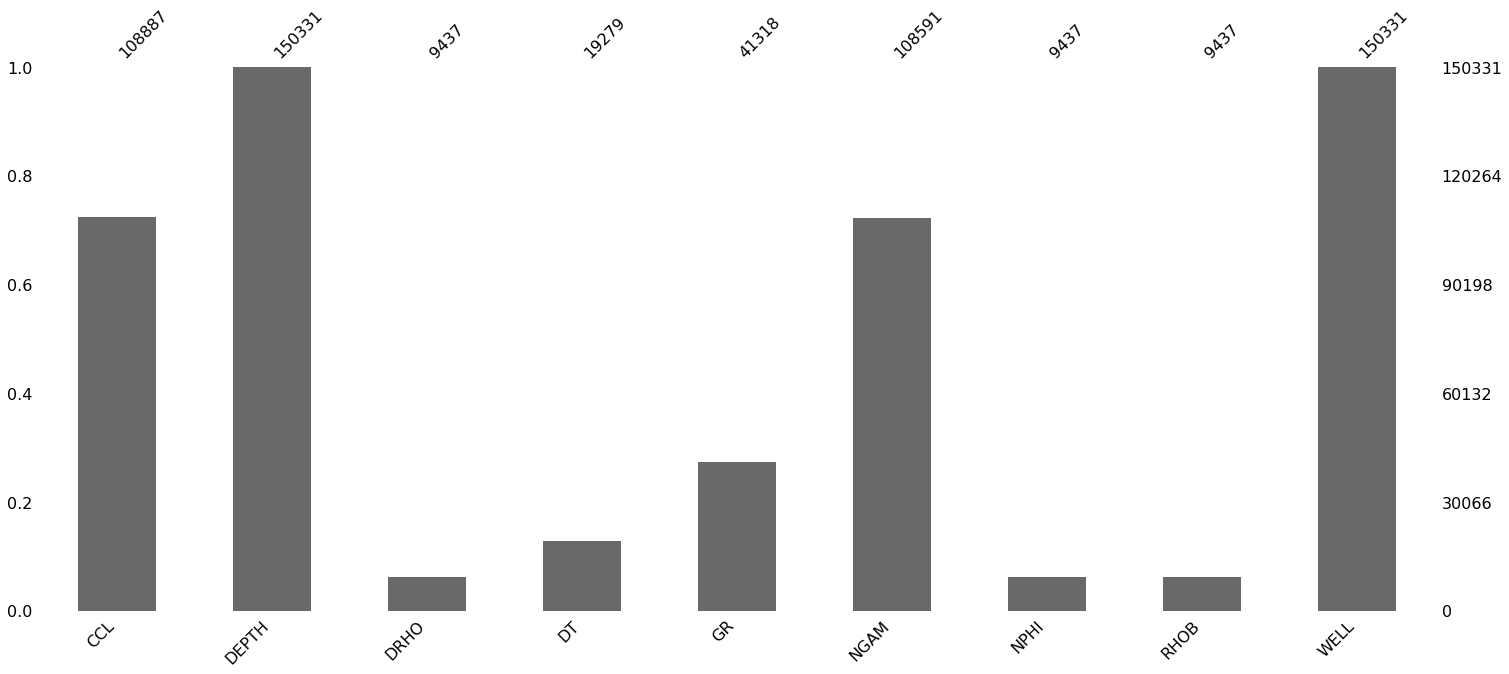

In [25]:
msn.bar(wells_single_df)   # Shows all the data contained for each log

<AxesSubplot:>

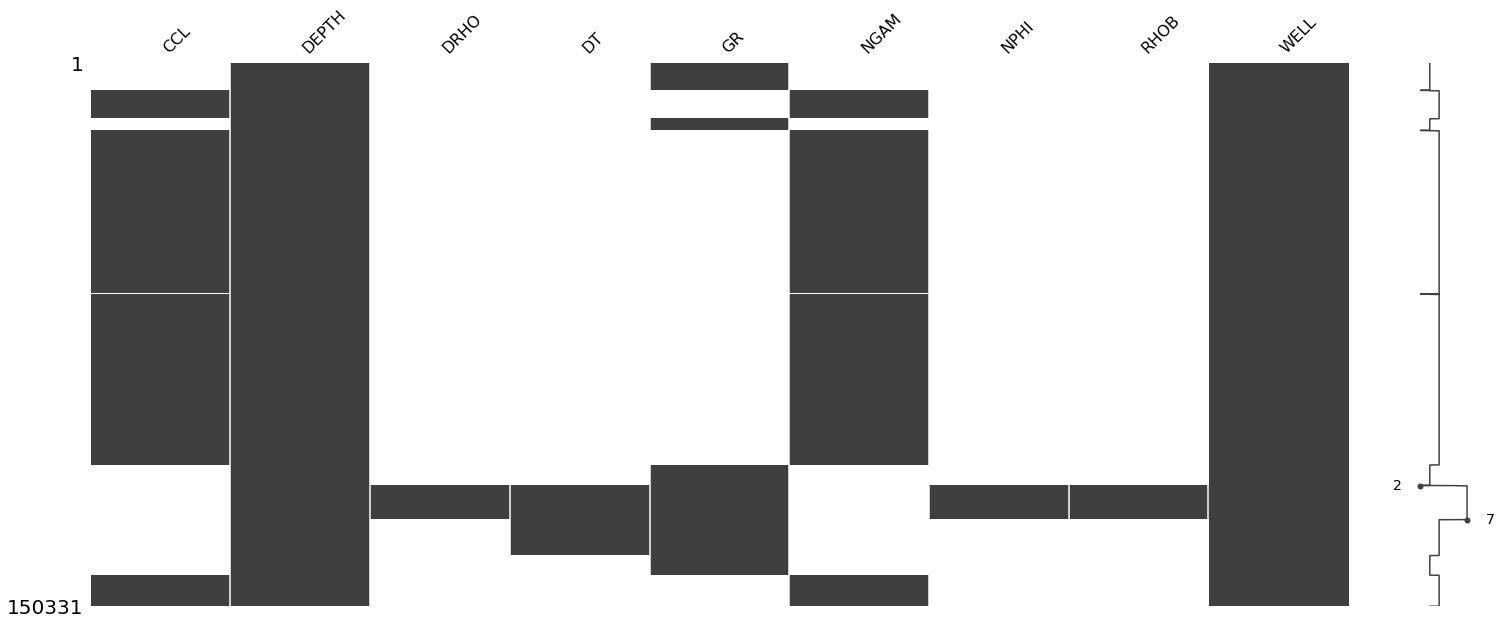

In [26]:
msn.matrix(wells_single_df)   # plot showing points with missing data

<a id="Quality"></a>
# Quality Assessment

#### Well log Data Quality

- Leveraging on the well quality module to assess the quality of each well

In [27]:
# defines the tests we want to run
t = {"Each": [wq.no_flat, 
              wq.no_gaps, 
              wq.not_empty],
         
        "GR": [wq.all_positive, wq.all_between(0,250), wq.check_units(["API", "GAPI"])],
         
       "RHOB": [wq.all_positive, wq.all_between(1.5, 3), wq.check_units(["G/CC", "g/cm3"])]}

In [28]:
# running our test to a variable 
results = las_wells.curve_table_html(keys=["GR", "RHOB"], tests=t)

# viewing the results of our tests using the HTML module
HTML(results)

Idx,UWI,Data,Passing,GR,RHOB
,,,%,8/12 wells,1/12 wells
0,023_19810823_1_GR,1/1 curves,100,GR⬤59.14 GAPI,⬤
1,060_19880503_2_GR,1/1 curves,100,GR⬤73.65 GAPI,⬤
2,096_19841002_1_GR,1/1 curves,100,GR⬤64.84 GAPI,⬤
3,N/A,0/2 curves,–,⬤,⬤
4,158_19770623_1_GR,1/1 curves,100,GR⬤21.25 GAPI,⬤
5,N/A,0/2 curves,–,⬤,⬤
6,N/A,0/2 curves,–,⬤,⬤
7,192_19880728_1_GR,1/1 curves,100,GR⬤71.36 GAPI,⬤
8,193_19880727_1_GR,1/1 curves,83,GR⬤68.33 GAPI,⬤


In [29]:
# leveraging on the for loop for obtain test results for only one well
wq_dict = {}
for _ in las_wells:
    wq_dict[_.name] = las_wells.curve_table_html(t)
    
    #_wells.curve_table_html(t)

In [30]:
HTML(wq_dict["B143"])

Idx,UWI,Data,Passing
,,,%
